In [1]:
#import lobraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load dataset
df = pd.read_csv(r"C:\Users\Acer\Downloads\diabetes.csv")
df.head()
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
#split dataset in features and target variable
feature_cols=['Pregnancies','Insulin','BMI','Age','Glucose','BloodPressure','DiabetesPedigreeFunction']
x=df[feature_cols] #Features
y=df.Outcome #Target variables

In [6]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x, y, train_size = 0.75, test_size=0.25,random_state=16)

In [7]:
#import class
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
logreg= LogisticRegression(random_state=16, max_iter=1000)
# fit the model with data
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

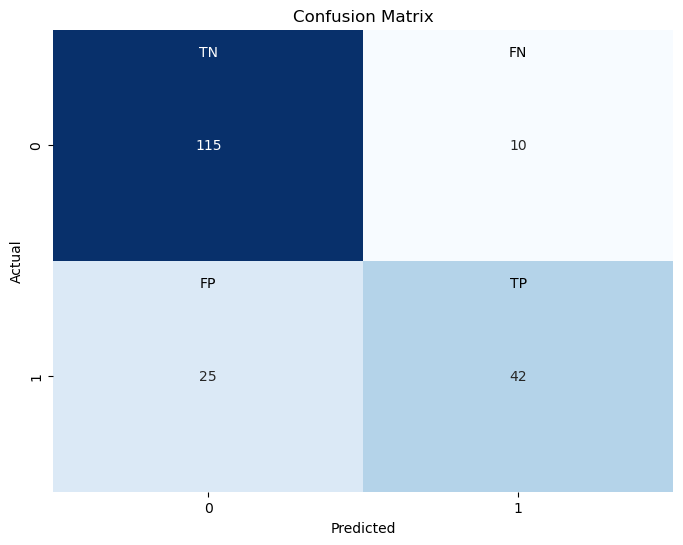

In [8]:
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

#calculating the confusion matrix
cnf_matrix=metrics.confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cnf_matrix, cmap="Blues",  annot= True, fmt='g', cbar =False)

#add labels
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.text(0.5, 0.1, 'TN', ha='center', va='center', color ='white')
plt.text(0.5, 1.1, 'FP', ha='center', va='center')
plt.text(1.5, 0.1, 'FN', ha='center', va='center')
plt.text(1.5, 1.1, 'TP', ha='center', va='center')

plt.show()

In [9]:
#calculating the precision, recalland f1-score
from sklearn.metrics import classification_report
target_names=['without_diabetes','with_diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without_diabetes       0.82      0.92      0.87       125
   with_diabetes       0.81      0.63      0.71        67

        accuracy                           0.82       192
       macro avg       0.81      0.77      0.79       192
    weighted avg       0.82      0.82      0.81       192



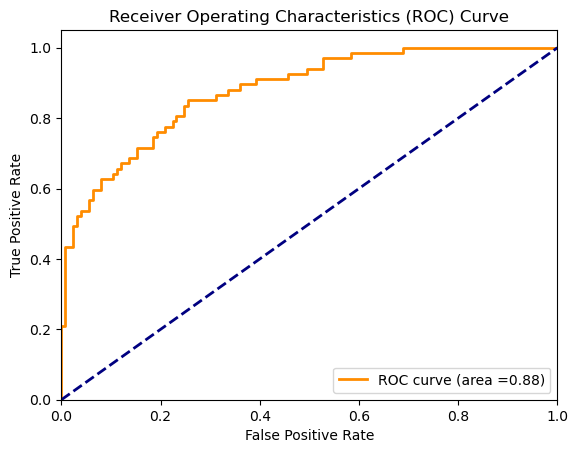

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Fit the logistic regression model
logreg.fit(x_train, y_train)

# Predict probabilities for the positive class
y_prob = logreg.predict_proba(x_test)[:,1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc= auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area =%0.2f)' %roc_auc)
plt.plot([0,1],[0,1], color='navy',lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

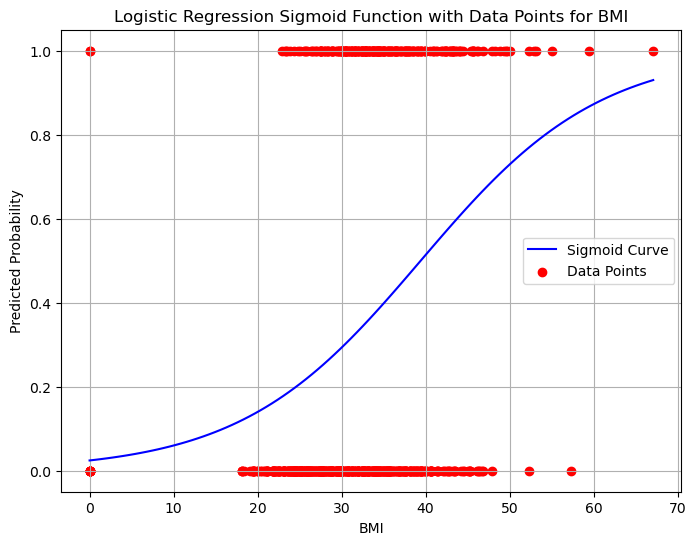

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Defining the sigmoid function
def sigmoid(x):
    return 1/(1 + np.exp(-x))

# Choose a feature column from your dataset
feature_name='BMI'
x_feature= df[feature_name].values.reshape(-1, 1)

# Fit the logistic regression model
logreg.fit(x_feature, y)

# Generate values for the feature column
x_values= np.linspace(np.min(x_feature), np.max(x_feature), 100).reshape(-1,1)
y_values =sigmoid(logreg.coef_ * x_values + logreg.intercept_).ravel()

# Calculate the predicted probabilities
plt.figure(figsize=(8,6))
plt.plot(x_values, y_values, color='blue', label ='Sigmoid Curve')

# Plot the sigmoid function
plt.scatter(x_feature, y, color ='red', label='Data Points')

# plot the data points
plt.xlabel(feature_name)
plt.ylabel('Predicted Probability')
plt.title('Logistic Regression Sigmoid Function with Data Points for ' + feature_name)
plt.legend()
plt.grid(True)
plt.show()

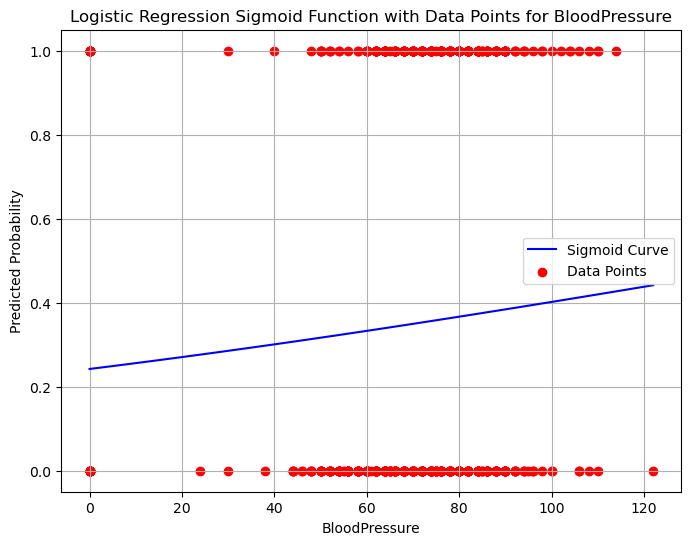

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Defining the sigmoid function
def sigmoid(x):
    return 1/(1 + np.exp(-x))

# Choose a feature column from your dataset
feature_name='BloodPressure'
x_feature= df[feature_name].values.reshape(-1, 1)

# Fit the logistic regression model
logreg.fit(x_feature, y)

# Generate values for the feature column
x_values= np.linspace(np.min(x_feature), np.max(x_feature), 100).reshape(-1,1)
y_values =sigmoid(logreg.coef_ * x_values + logreg.intercept_).ravel()

# Calculate the predicted probabilities
plt.figure(figsize=(8,6))
plt.plot(x_values, y_values, color='blue', label ='Sigmoid Curve')

# Plot the sigmoid function
plt.scatter(x_feature, y, color ='red', label='Data Points')

# plot the data points
plt.xlabel(feature_name)
plt.ylabel('Predicted Probability')
plt.title('Logistic Regression Sigmoid Function with Data Points for ' + feature_name)
plt.legend()
plt.grid(True)
plt.show()

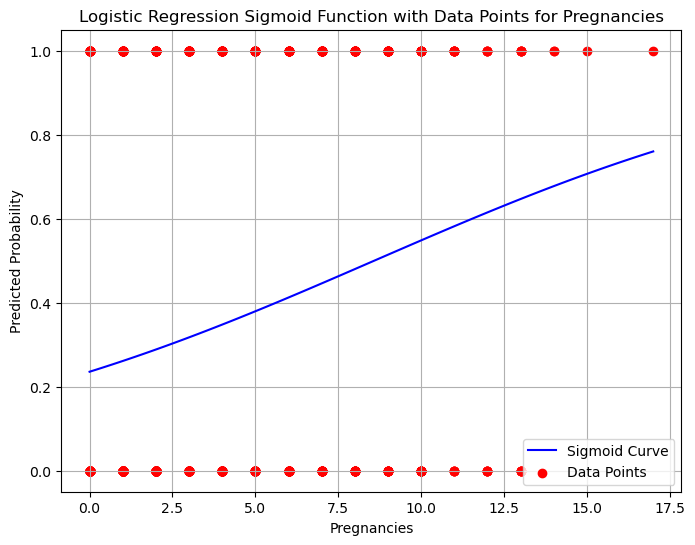

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Defining the sigmoid function
def sigmoid(x):
    return 1/(1 + np.exp(-x))

# Choose a feature column from your dataset
feature_name='Pregnancies'
x_feature= df[feature_name].values.reshape(-1, 1)

# Fit the logistic regression model
logreg.fit(x_feature, y)

# Generate values for the feature column
x_values= np.linspace(np.min(x_feature), np.max(x_feature), 100).reshape(-1,1)
y_values =sigmoid(logreg.coef_ * x_values + logreg.intercept_).ravel()

# Calculate the predicted probabilities
plt.figure(figsize=(8,6))
plt.plot(x_values, y_values, color='blue', label ='Sigmoid Curve')

# Plot the sigmoid function
plt.scatter(x_feature, y, color ='red', label='Data Points')

# plot the data points
plt.xlabel(feature_name)
plt.ylabel('Predicted Probability')
plt.title('Logistic Regression Sigmoid Function with Data Points for ' + feature_name)
plt.legend()
plt.grid(True)
plt.show()

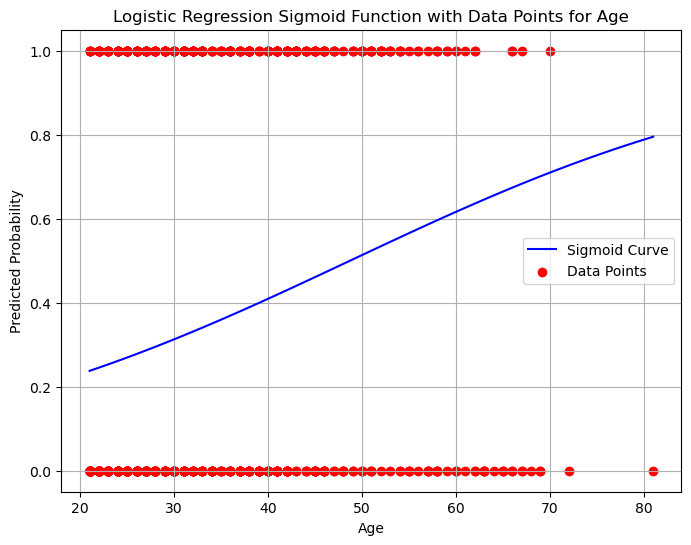

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Defining the sigmoid function
def sigmoid(x):
    return 1/(1 + np.exp(-x))

# Choose a feature column from your dataset
feature_name='Age'
x_feature= df[feature_name].values.reshape(-1, 1)

# Fit the logistic regression model
logreg.fit(x_feature, y)

# Generate values for the feature column
x_values= np.linspace(np.min(x_feature), np.max(x_feature), 100).reshape(-1,1)
y_values =sigmoid(logreg.coef_ * x_values + logreg.intercept_).ravel()

# Calculate the predicted probabilities
plt.figure(figsize=(8,6))
plt.plot(x_values, y_values, color='blue', label ='Sigmoid Curve')

# Plot the sigmoid function
plt.scatter(x_feature, y, color ='red', label='Data Points')

# plot the data points
plt.xlabel(feature_name)
plt.ylabel('Predicted Probability')
plt.title('Logistic Regression Sigmoid Function with Data Points for ' + feature_name)
plt.legend()
plt.grid(True)
plt.show()